In [1]:
#La régression logistique est utilisée pour les problèmes de classification binaire avec deux résultats possibles.

#La régression logistique utilise une fonction sigmoïde comme équation linéaire pour prédire une valeur.

#Pour mesurer les performances du modèle, nous utilisons une matrice de confusion où la sortie peut être de deux classes ou plus.

#La matrice de confusion est utile pour déduire le rappel, la précision, la spécificité, l'exactitude.

In [2]:
#1. Appliquez la régression logistique.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv('C:/Users/DELL/Desktop/GOMYCODE/titanic_passengers.csv', sep=';')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# I-Phase of Preprocessing and Visualization

# I-1-Pretreatment Phase

# Shape analysis:

variable target:Survived
rows and columns:(891, 12)
variable types:int64,object,float64

Background analysis:
visualization of the target:+60% did not survive.
-40% survived.
meaning of variables: standardized float variables.
qualitative variables not all binary, name variables a bit
useless, useful qualitative variables are:
Survived, Embarked.
Relation Variables/Target:
81 women did not survive while 233 survived.
468 men did not survive and 109 survived.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [17]:
df.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have a lot of missing data in the Age column. Not bad for the Embarked and Cabin column.

In [13]:
df['Embarked'].fillna('S',inplace=True)
df['Age'].fillna(df.Age.mean(),inplace=True)
df['Cabin'].fillna('G6',inplace=True)

In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Examen de la colonne Target

In [15]:
print(df['Survived'].value_counts())
print(df['Survived'].value_counts(normalize=True))

No     549
Yes    342
Name: Survived, dtype: int64
No     0.616162
Yes    0.383838
Name: Survived, dtype: float64


We have 342 people who survived while 549 couldn't.
which therefore corresponds to a rate of 38.38% for survivors and
a rate of 61.7% for non-survivors.

# data visualization phase

# Histograms of continuous variables

<Figure size 432x288 with 0 Axes>

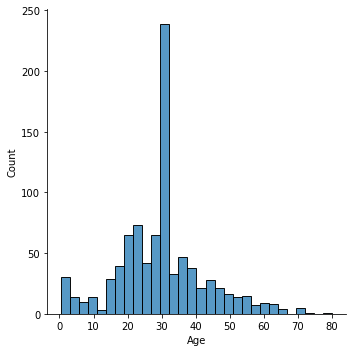

<Figure size 432x288 with 0 Axes>

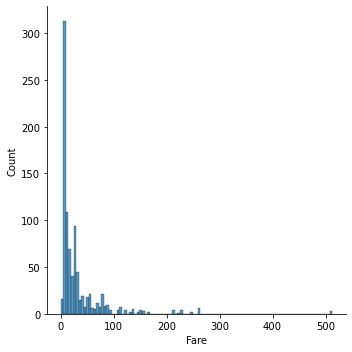

In [18]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])

The ages range from 0 to 80 years old. there are many more 30-year-olds.
The proportion of young people aged 20 to 30 is still high.
Rates start from 0 to 100. From 100, there is a scarcity of rates.

<Figure size 432x288 with 0 Axes>

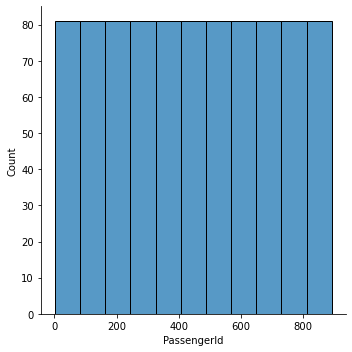

<Figure size 432x288 with 0 Axes>

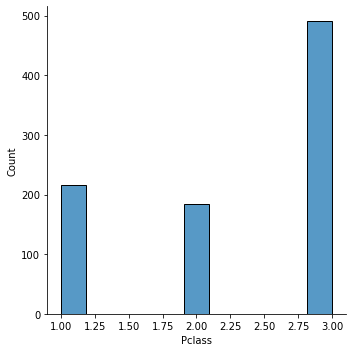

<Figure size 432x288 with 0 Axes>

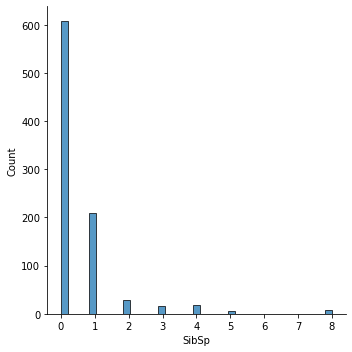

<Figure size 432x288 with 0 Axes>

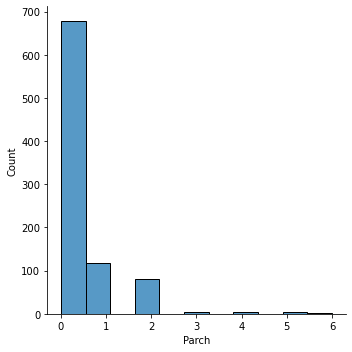

In [19]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.displot(df[col])

the number of parents/children per passenger varies from 0 to 5 but much more between 0 and 2.
the number of brothers/sisters per passenger varies from 0 to 5 but much more between 0 and 1.
there are 3 classes of passengers. passengers of class 1,2 and 3.

# Observation of the impact of categorical variables on survival.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


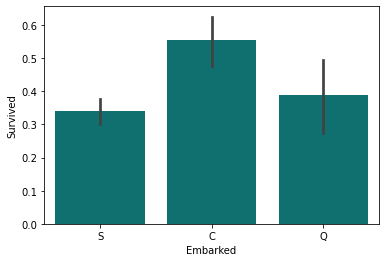

In [77]:
sns.barplot('Embarked', 'Survived', data=df, color="teal")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


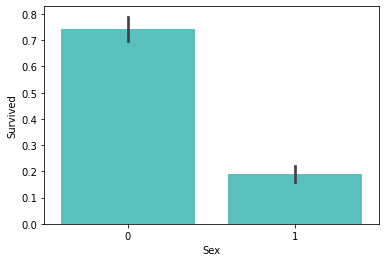

In [79]:
sns.barplot('Sex', 'Survived', data=df, color="mediumturquoise")
plt.show()

We observe that the number of women who survived is higher
to that of the men who survived. Those who embarked in C survived much more than those of the two other categories, that is to say those of S and Q.

# Correlation between variables

In [76]:
df.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

We have a correlation of 25.73% between the tariff and Survived and a correlation of 8.2% between the Parch and Survived.

# Logistic Regression

In [53]:
from sklearn.model_selection import train_test_split

In [193]:
df1=df.drop(['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Ticket','Cabin','Embarked'],axis=1)
df2=df.Survived

In [194]:
X_train,X_test,Y_train,Y_test=train_test_split(df1,df2,test_size=0.2)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (712, 2)
Test set: (179, 2)


In [195]:
model= LogisticRegression()

In [196]:
model.fit(X_train,Y_train)

LogisticRegression()

In [197]:
predictions=model.predict(X_train)

In [198]:
model.score(X_test,Y_test)

0.6312849162011173

Our model gives us a learning rate of 63.13%.
Our model still learns well.

In [199]:
#2. Utilisez une matrice de confusion pour valider votre modèle. 

# Confusion Matrix

In [200]:
from sklearn.metrics import confusion_matrix

In [201]:
confusion_matrix(Y_test,model.predict(X_test))

array([[97,  9],
       [57, 16]], dtype=int64)

Here is the result given by the confusion matrix

In [202]:
#3. Une autre matrice de validation pour la classification est ROC / AUC, faites vos recherches sur eux, expliquez-les et appliquez-les dans notre cas.

# Explanation of ROC/AUC

# Receiver Operating Characteristics(ROC)

Performance measurement is essential for machine learning activities. ROC or Area Under Curve/AUC helps us solve the problems we encounter during classification. When we check or visualize the performance of the different classifications of a model, we use these measures or curves to evaluate the result. ROC stands for Receiver Operating Characteristics, and AUC stands for Area Under the Curve. We can also write this term as AUROC or Area Under the Receiver Operating Characteristics.

# Area Under the Receiver

AUC helps to compare different classifiers. You can summarize the performance of each classifier in a single metric. The basic approach to finding the AUC is to calculate the AUROC. It is similar to the probability that the random negative instance is less than the positive instance. If a classifier has a lower AUC than another classifier, it normally means the high AUC score is not good. However, SSC works well as part of the general measure of predictive accuracy.

# Application of ROC/AUC to our present case

In [203]:
from sklearn.metrics import roc_curve

In [204]:
pred_proba=model.predict_proba(X_test)

In [205]:
Y_test.shape

(179,)

In [206]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [212]:
Y_pred=model.predict(X_test)

In [213]:
[fpr, tpr, thr] = roc_curve(Y_test,Y_pred)

In [214]:
idx = np.min(np.where(tpr > 0.95))

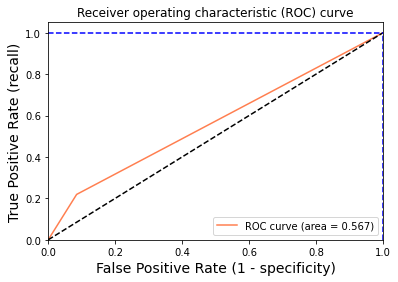

In [215]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()